In [ ]:
pip install opencv-python


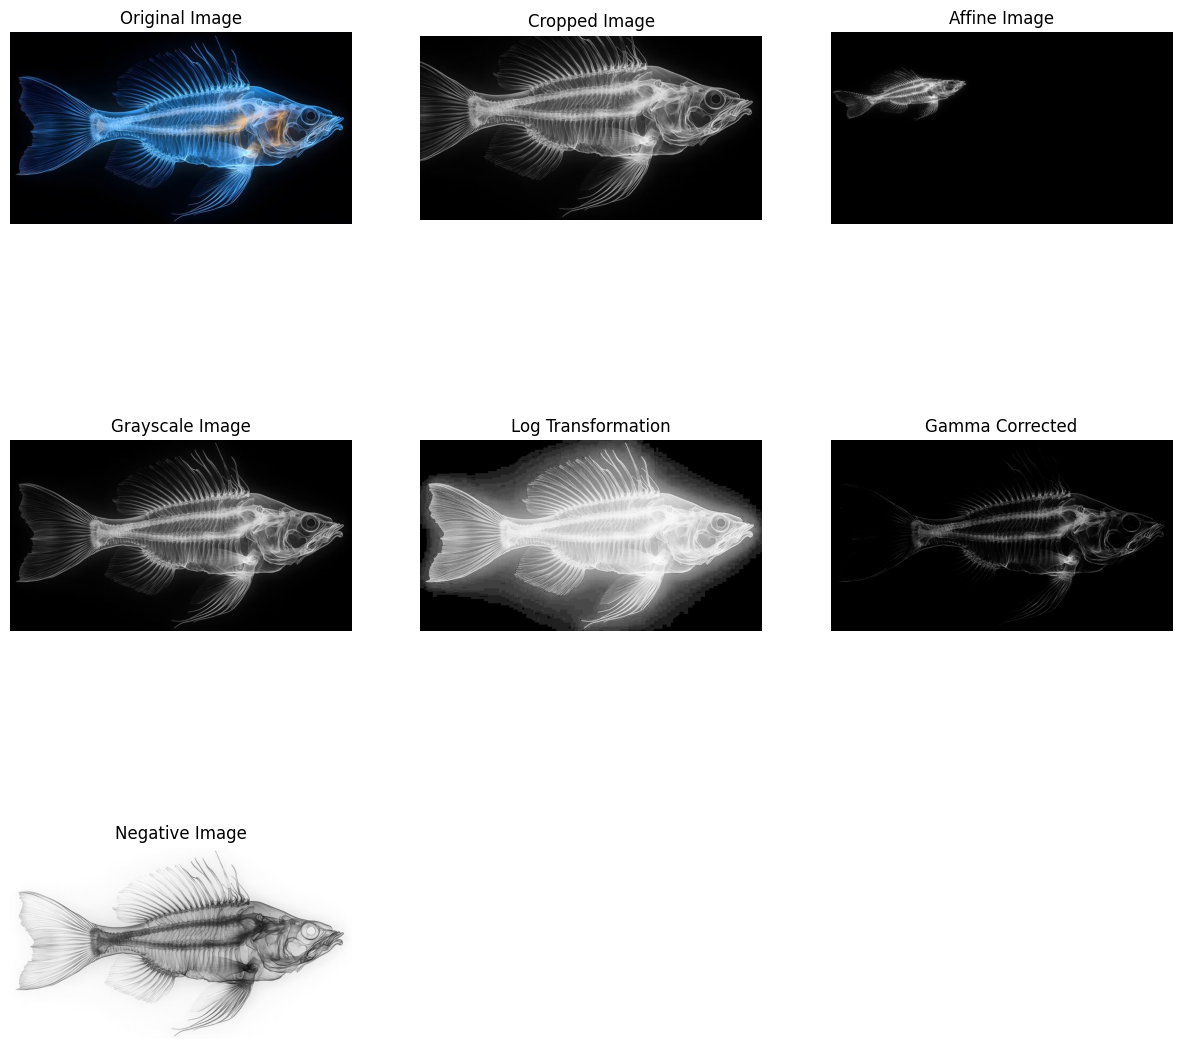

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load image and convert to grayscale
image = cv2.imread('k.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# CROP SECTION
x, y, w, h = 70, 50, 800, 600
cropped_image = image_gray[y:y+h, x:x+w]

# Get image dimensions for affine transformation
rows, cols = image_gray.shape

# AFFINE SECTION
pts1 = np.float32([[50, 50], [800, 50], [50, 600]])
pts2 = np.float32([[10, 100], [300, 50], [100, 250]])
matrix = cv2.getAffineTransform(pts1, pts2)

affine_image = cv2.warpAffine(image_gray, matrix, (cols, rows))

# Log Transformation
c = 200 / np.log(1 + np.max(image_gray))
log_image = c * np.log(1 + image_gray.astype(np.float32))
log_image = np.uint8(log_image)

# Gamma Correction
gamma = 3.0
gamma_corrected = np.power(image_gray / 255.0, gamma)  # Normalize to [0,1] range
gamma_corrected = np.uint8(gamma_corrected * 255)  # Scale back to [0,255] range

# Negative Image
negative_image = 255 - image_gray

# Titles for each subplot
title = ['Original Image', 'Cropped Image', 'Affine Image', 'Grayscale Image', 'Log Transformation', 'Gamma Corrected', 'Negative Image']
images = [image, cropped_image, affine_image, image_gray, log_image, gamma_corrected, negative_image]

# Display the images using Matplotlib
plt.figure(figsize=(15, 15))
for i in range(7):  # Adjusted to 7 to accommodate the original image
    plt.subplot(3, 3, i + 1)  # Changed to 3x3 grid to fit 7 images
    if i == 0:  # For the original image, display in color
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for display
    else:
        plt.imshow(images[i], cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.title(title[i])
    plt.axis('off')

plt.show()
